### Test case: Transporting with a transfer hub

Runs a simulation with two vessels: one small vessel transporting goods from A to B, and one large vessel transporting goods from B to C. The second vessel is only supposed to load and depart once the level at site B reaches the capacity of the vessel.

No resource limitations apply to the sites. Scenario 1 means the small vessel can 'keep up' so no waiting once level at site B reaches threshold value. Scenario 2, the small vessel cannot keep up and hence the large vessel needs to wait multiple times (for the level at site B to reach threshold value).

#### Import libraries

In [1]:
import networkx as nx

from openclsim.plot import get_gantt_chart
from openclsim.plot.graph_dependencies import DependencyGraph
from openclsim.plot.critical_path_log import CpLog

from scenario_parallel_in_while import getActivitiesAndObjects

#### Run the simulation

In [2]:
act, obj = getActivitiesAndObjects()

#### Plot the Gantt chart

In [3]:
fig = get_gantt_chart(obj)

#### Check the dependencies

With the dependency graph dependecies for generic/base activities (Move, Basic, ShiftAmount) are extracted from the model setup. This excludes (time dependent) dependencies, such as start conditions based on container level and resource limitations.

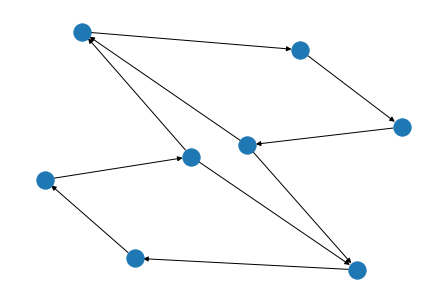

In [4]:
dep_G = DependencyGraph(act)
nx.draw(dep_G.G)

#### Get critical path log and dependencies

In [5]:
my_cp_log_l = CpLog(obj, act)
my_cp_log_l.get_dependencies()
my_cp_log_l.mark_critical_activities()
#my_cp_log_l.make_gantt_mpl()
my_cp_log_l.make_gantt_plotly()

-- total elapsed time 0.12200021743774414 seconds


### Full critical log and dependencies output
If one is interested, the logging and the dependencies as used for critical path determination can be shown.

In [6]:
print(my_cp_log_l.all_cp_dependencies)
my_cp_log_l.cp_log.head()

[('cp_activity_109', 'cp_activity_126'), ('cp_activity_124', 'cp_activity_56'), ('cp_activity_77', 'cp_activity_111'), ('cp_activity_121', 'cp_activity_87'), ('cp_activity_125', 'cp_activity_91'), ('cp_activity_119', 'cp_activity_136'), ('cp_activity_27', 'cp_activity_79'), ('cp_activity_58', 'cp_activity_24'), ('cp_activity_132', 'cp_activity_98'), ('cp_activity_33', 'cp_activity_17'), ('cp_activity_117', 'cp_activity_134'), ('cp_activity_2', 'cp_activity_36'), ('cp_activity_8', 'cp_activity_42'), ('cp_activity_30', 'cp_activity_14'), ('cp_activity_66', 'cp_activity_32'), ('cp_activity_123', 'cp_activity_55'), ('cp_activity_81', 'cp_activity_115'), ('cp_activity_112', 'cp_activity_129'), ('cp_activity_116', 'cp_activity_133'), ('cp_activity_122', 'cp_activity_54'), ('cp_activity_104', 'cp_activity_121'), ('cp_activity_1', 'cp_activity_35'), ('cp_activity_79', 'cp_activity_113'), ('cp_activity_114', 'cp_activity_131'), ('cp_activity_13', 'cp_activity_47'), ('cp_activity_131', 'cp_activ

,Activity,ActivityID,SimulationObject,start_time,state,duration,end_time,cp_activity_id,is_critical
0,vessel_b: loading,10d75f16-720d-4d14-9ab3-e422d8a29214,from_site,1970-01-01 00:00:00,ACTIVE,0 days 00:01:40,1970-01-01 00:01:40.000000,cp_activity_69,True
1,vessel_a: loading,17cdfffe-c596-48c9-894a-b3aaa9cce73e,from_site,1970-01-01 00:00:00,ACTIVE,0 days 00:03:20,1970-01-01 00:03:20.000000,cp_activity_1,False
2,vessel_a: loading,17cdfffe-c596-48c9-894a-b3aaa9cce73e,vessel_a,1970-01-01 00:00:00,ACTIVE,0 days 00:03:20,1970-01-01 00:03:20.000000,cp_activity_1,False
3,vessel_b: loading,10d75f16-720d-4d14-9ab3-e422d8a29214,vessel_b,1970-01-01 00:00:00,ACTIVE,0 days 00:01:40,1970-01-01 00:01:40.000000,cp_activity_69,True
4,vessel_b: sailing full,ad1336eb-2d56-4697-97d0-5d878d7110b4,vessel_b,1970-01-01 00:01:40,ACTIVE,0 days 00:15:42.824591,1970-01-01 00:17:22.824591,cp_activity_103,True
